<br/>

## Tarea 4 - Modelo Lineal
### Alumno - Sebastián Ituarte
<span style="color:green"><b>Minería de datos empresariales</b></span>

---


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

## Actividad 1

In [3]:
# Importamos datos necesarios a DataFrame
df = pd.read_csv("apple_quality.csv")

In [4]:
# Imprimimos características
print("Características del Dataframe")
num_filas, num_columnas = df.shape
print(df.shape)

# Cantidad de registros filas
print("Cantidad de filas")
print(num_filas)

# Cantidad de características columnas
print("Cantidad de columnas")
print(num_columnas)

# Imprimimos los nombres de las columnas
print("\n")
print("Nombre de sus columnas")
print(df.columns)

Características del Dataframe
(4001, 9)
Cantidad de filas
4001
Cantidad de columnas
9


Nombre de sus columnas
Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')


In [5]:
# Visualizar las primeras filas del dataset
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [6]:
# Obtener un resumen estadístico de los datos
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [7]:
# Estudiamos el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [8]:
# Registrar si hay duplicados
duplicated_rows = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicated_rows}")

Cantidad de filas duplicadas: 0


In [9]:
df.count()

A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4001
Quality        4000
dtype: int64

In [10]:
# Mostrar si hay valores ausentes
missing_values = df.isnull().sum()
print(f"Valores ausentes por atributo:\n{missing_values}")

Valores ausentes por atributo:
A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [11]:
df.isnull().sum().sum()

8

In [12]:
# Eliminar filas con valores ausentes
df.dropna(inplace=True)

# Mostrar la cantidad de valores ausentes después de la eliminación
missing_values_after = df.isnull().sum()
print(f"Valores ausentes después de la eliminación:\n{missing_values_after}")

Valores ausentes después de la eliminación:
A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [13]:
# Asegurar que la columna 'Acidity' está en el tipo de datos float64
df["Acidity"] = df["Acidity"].astype("float64")

# Verificar el tipo de datos de la columna 'Acidity'
df.dtypes["Acidity"]

dtype('float64')

In [14]:
# Eliminar la columna A_id del DataFrame
df.drop(columns=["A_id"], inplace=True)

In [15]:
# Estudiamos el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


In [16]:
# Obtener un resumen estadístico de los datos luego de eliminación y transformación
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [17]:
# Función para detectar outliers usando IQR
def detect_outliers(df, column):
    if df[column].dtype in ["int64", "float64"]:
        Q1 = np.quantile(df[column], 0.25)
        Q3 = np.quantile(df[column], 0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

In [18]:
# Variables continuas
continuous_columns = df.drop(columns=["Quality"]).columns

continuous_columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

In [19]:
# Mostrar la cantidad de outliers para cada columna continua
for column in continuous_columns:
    outliers_count = detect_outliers(df, column)
    print(f"{column}: {outliers_count} outliers")

Size: 22 outliers
Weight: 54 outliers
Sweetness: 32 outliers
Crunchiness: 47 outliers
Juiciness: 32 outliers
Ripeness: 24 outliers
Acidity: 20 outliers


In [20]:
# Función para borrar outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [21]:
# Eliminar outliers para cada columna
for column in continuous_columns:
    df = remove_outliers(df, column)

### Justificación para Eliminar Outliers

1. **Mejora en la Calidad del Modelo**:
   - Al eliminar los outliers, es probable que el modelo de regresión lineal se ajuste mejor a los datos restantes, ya que los valores extremos no distorsionarán la media y la desviación estándar.

2. **Robustez del Análisis**:
   - Eliminar outliers puede hacer que los análisis estadísticos sean más robustos y representativos de la población general.

3. **Datos Limpiados**:
   - La eliminación de outliers ayuda a limpiar el dataset, lo que puede resultar en un análisis más claro y preciso.

In [22]:
df.tail()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,good


In [23]:
# Ver la info luego de eliminar datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3786 entries, 1 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3786 non-null   float64
 1   Weight       3786 non-null   float64
 2   Sweetness    3786 non-null   float64
 3   Crunchiness  3786 non-null   float64
 4   Juiciness    3786 non-null   float64
 5   Ripeness     3786 non-null   float64
 6   Acidity      3786 non-null   float64
 7   Quality      3786 non-null   object 
dtypes: float64(7), object(1)
memory usage: 266.2+ KB


In [24]:
# Ver la info luego de eliminar datos
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000
mean,-0.510341,-0.986935,-0.478651,0.985697,0.500146,0.526871,0.059527
std,1.850207,1.497316,1.871786,1.297315,1.849076,1.800784,2.046333
min,-5.692093,-5.058679,-5.548641,-2.620954,-4.667150,-4.471210,-5.634195
25%,-1.796627,-1.967852,-1.724304,0.094724,-0.793372,-0.707739,-1.371829
50%,-0.514404,-0.979316,-0.504758,0.996911,0.509758,0.527629,0.014862
75%,0.769200,0.010353,0.777221,1.874618,1.786527,1.768073,1.465006
max,4.524772,3.081538,4.606386,4.591936,5.598023,5.484760,5.685253


In [25]:
def estadistica(data, var):
    q1 = np.percentile(data[var], 25)
    q3 = np.percentile(data[var], 75)
    iqr = q3 - q1

    data_estadistica = {
        "media": np.mean(data[var]),
        "desviacion_std": np.std(data[var], ddof=1),
        "mediana": np.median(data[var]),
        "varianza": np.var(data[var], ddof=1),
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
    }

    print(f"Datos estadisticos para variable - {var}")
    print(data_estadistica)


# Analizamos las variables previo a crear los gráficos
for variable in continuous_columns:
    estadistica(df, variable)
    print("\n")

Datos estadisticos para variable - Size
{'media': -0.5103405585810882, 'desviacion_std': 1.8502073632270397, 'mediana': -0.514404463, 'varianza': 3.423267286939555, 'q1': -1.7966266845, 'q3': 0.769199734, 'iqr': 2.5658264185}


Datos estadisticos para variable - Weight
{'media': -0.9869347036436873, 'desviacion_std': 1.4973164287650131, 'mediana': -0.979315967, 'varianza': 2.2419564878496128, 'q1': -1.9678516395, 'q3': 0.010352875000000001, 'iqr': 1.9782045145}


Datos estadisticos para variable - Sweetness
{'media': -0.47865055388721606, 'desviacion_std': 1.8717856305637992, 'mediana': -0.5047584635, 'varianza': 3.5035814467851196, 'q1': -1.72430444175, 'q3': 0.77722107375, 'iqr': 2.5015255155}


Datos estadisticos para variable - Crunchiness
{'media': 0.9856973094690967, 'desviacion_std': 1.2973147592489218, 'mediana': 0.99691061, 'varianza': 1.683025584565088, 'q1': 0.09472442349999999, 'q3': 1.8746184485, 'iqr': 1.779894025}


Datos estadisticos para variable - Juiciness
{'media': 

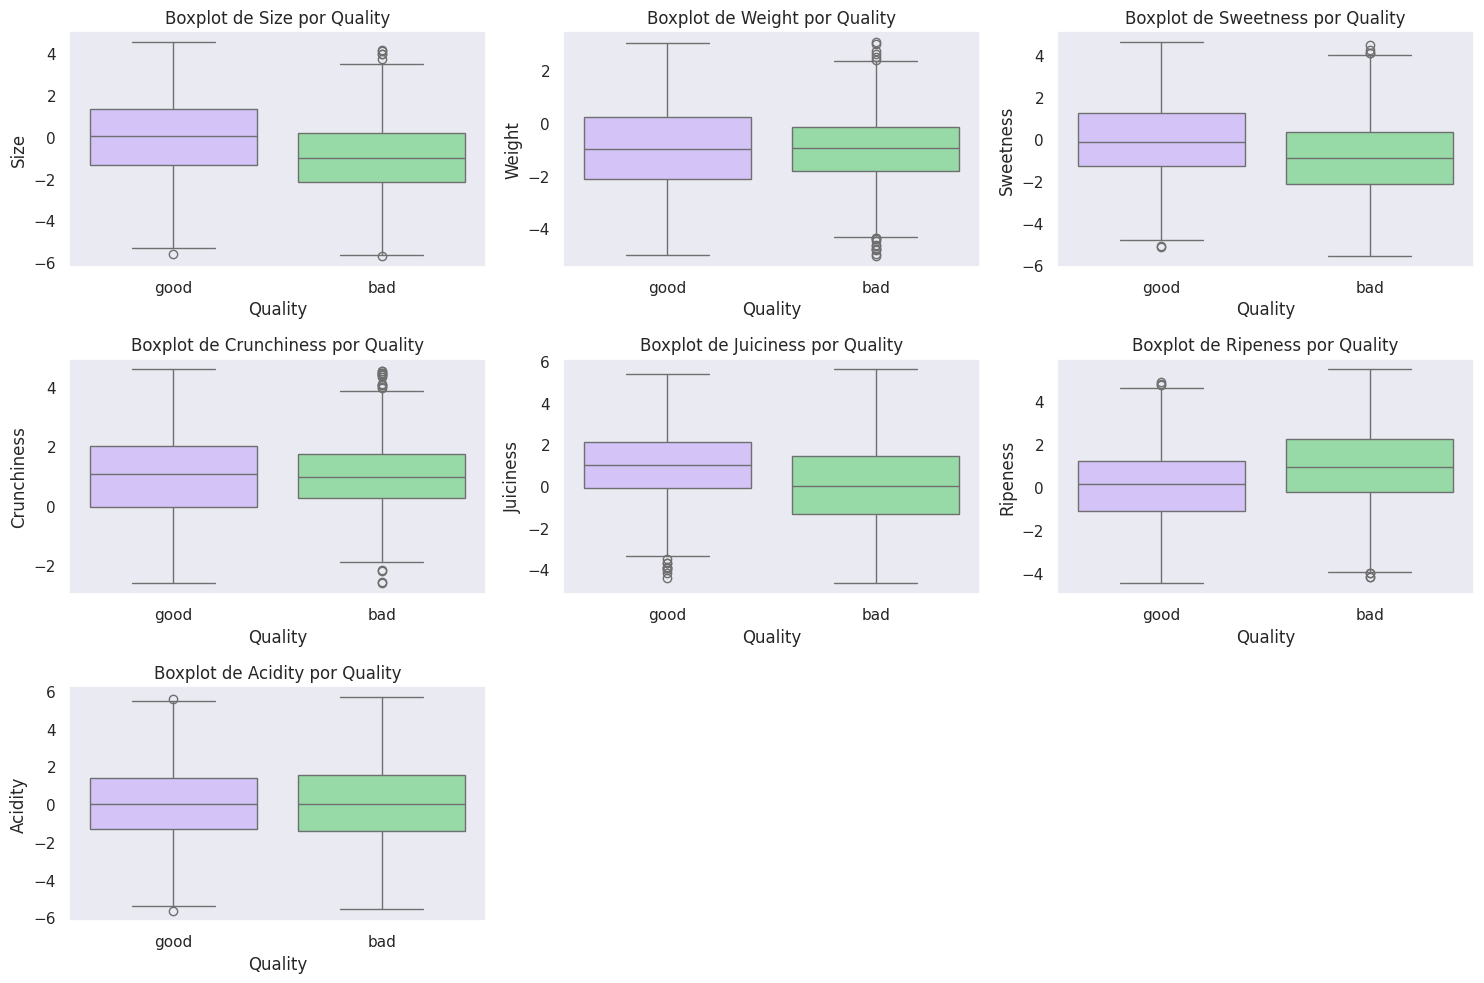

In [26]:
# Boxplots para variables continuas separadas por la variable objetivo 'target'
sns.set_theme(style="dark", palette="pastel")
plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x="Quality", y=column, palette=["m", "g"], hue="Quality")
    plt.title(f"Boxplot de {column} por Quality")
plt.tight_layout()
plt.show()

### Explicación de Hallazgos Basados en los Boxplots


#### 1. Size por Quality
- **Good Quality**: La mediana está ligeramente por encima de 0, con una distribución relativamente simétrica. No hay muchos outliers.
- **Bad Quality**: La mediana está ligeramente por debajo de 0, con una mayor dispersión de valores hacia los extremos. Hay algunos outliers.

#### 2. Weight por Quality
- **Good Quality**: La mediana está cerca de 0. La mayoría de los valores están dentro de un rango estrecho, aunque hay algunos outliers.
- **Bad Quality**: La mediana está un poco más baja que la de "Good Quality", y hay más outliers, indicando una mayor variabilidad.

#### 3. Sweetness por Quality
- **Good Quality**: La mediana está cerca de 0, con una distribución más concentrada y menos outliers.
- **Bad Quality**: La mediana es más baja y la distribución tiene una mayor dispersión hacia los valores más bajos, con varios outliers presentes.

#### 4. Crunchiness por Quality
- **Good Quality**: La mediana es cercana a 0, con una distribución concentrada y pocos outliers.
- **Bad Quality**: La mediana es un poco más baja y la distribución es más dispersa con varios outliers.

#### 5. Juiciness por Quality
- **Good Quality**: La mediana está cerca de 0, con una distribución bastante simétrica y algunos outliers.
- **Bad Quality**: La mediana es más baja y hay menos outliers, aunque la dispersión es similar.

#### 6. Ripeness por Quality
- **Good Quality**: La mediana es cercana a 0. La distribución es más concentrada con pocos outliers.
- **Bad Quality**: La mediana es más baja y hay una mayor dispersión hacia los valores más bajos, con algunos outliers.

#### 7. Acidity por Quality
- **Good Quality**: La mediana está cerca de 0, con una distribución relativamente simétrica y pocos outliers.
- **Bad Quality**: La mediana es un poco más baja y hay una mayor dispersión de valores con algunos outliers.

### Conclusiones Generales
1. **Diferencias en la Mediana**: En la mayoría de las características, los valores de la mediana son más bajos en la categoría de "Bad Quality" en comparación con "Good Quality". Esto sugiere que las frutas de menor calidad tienden a tener menores valores en estas características.

2. **Variabilidad y Outliers**: Las frutas de "Bad Quality" muestran una mayor variabilidad en varias características como Weight, Sweetness, y Crunchiness. Esto se observa por la mayor cantidad de outliers y una dispersión más amplia de los datos en comparación con las frutas de "Good Quality".

3. **Implicaciones**: Estas diferencias en la distribución de características entre las categorías de calidad pueden ser utilizadas para desarrollar criterios de evaluación de calidad más precisos. Por ejemplo, si se observa que frutas con valores de Sweetness significativamente bajos tienden a ser de menor calidad, se podría establecer un umbral mínimo de Sweetness para clasificar una fruta como de buena calidad.


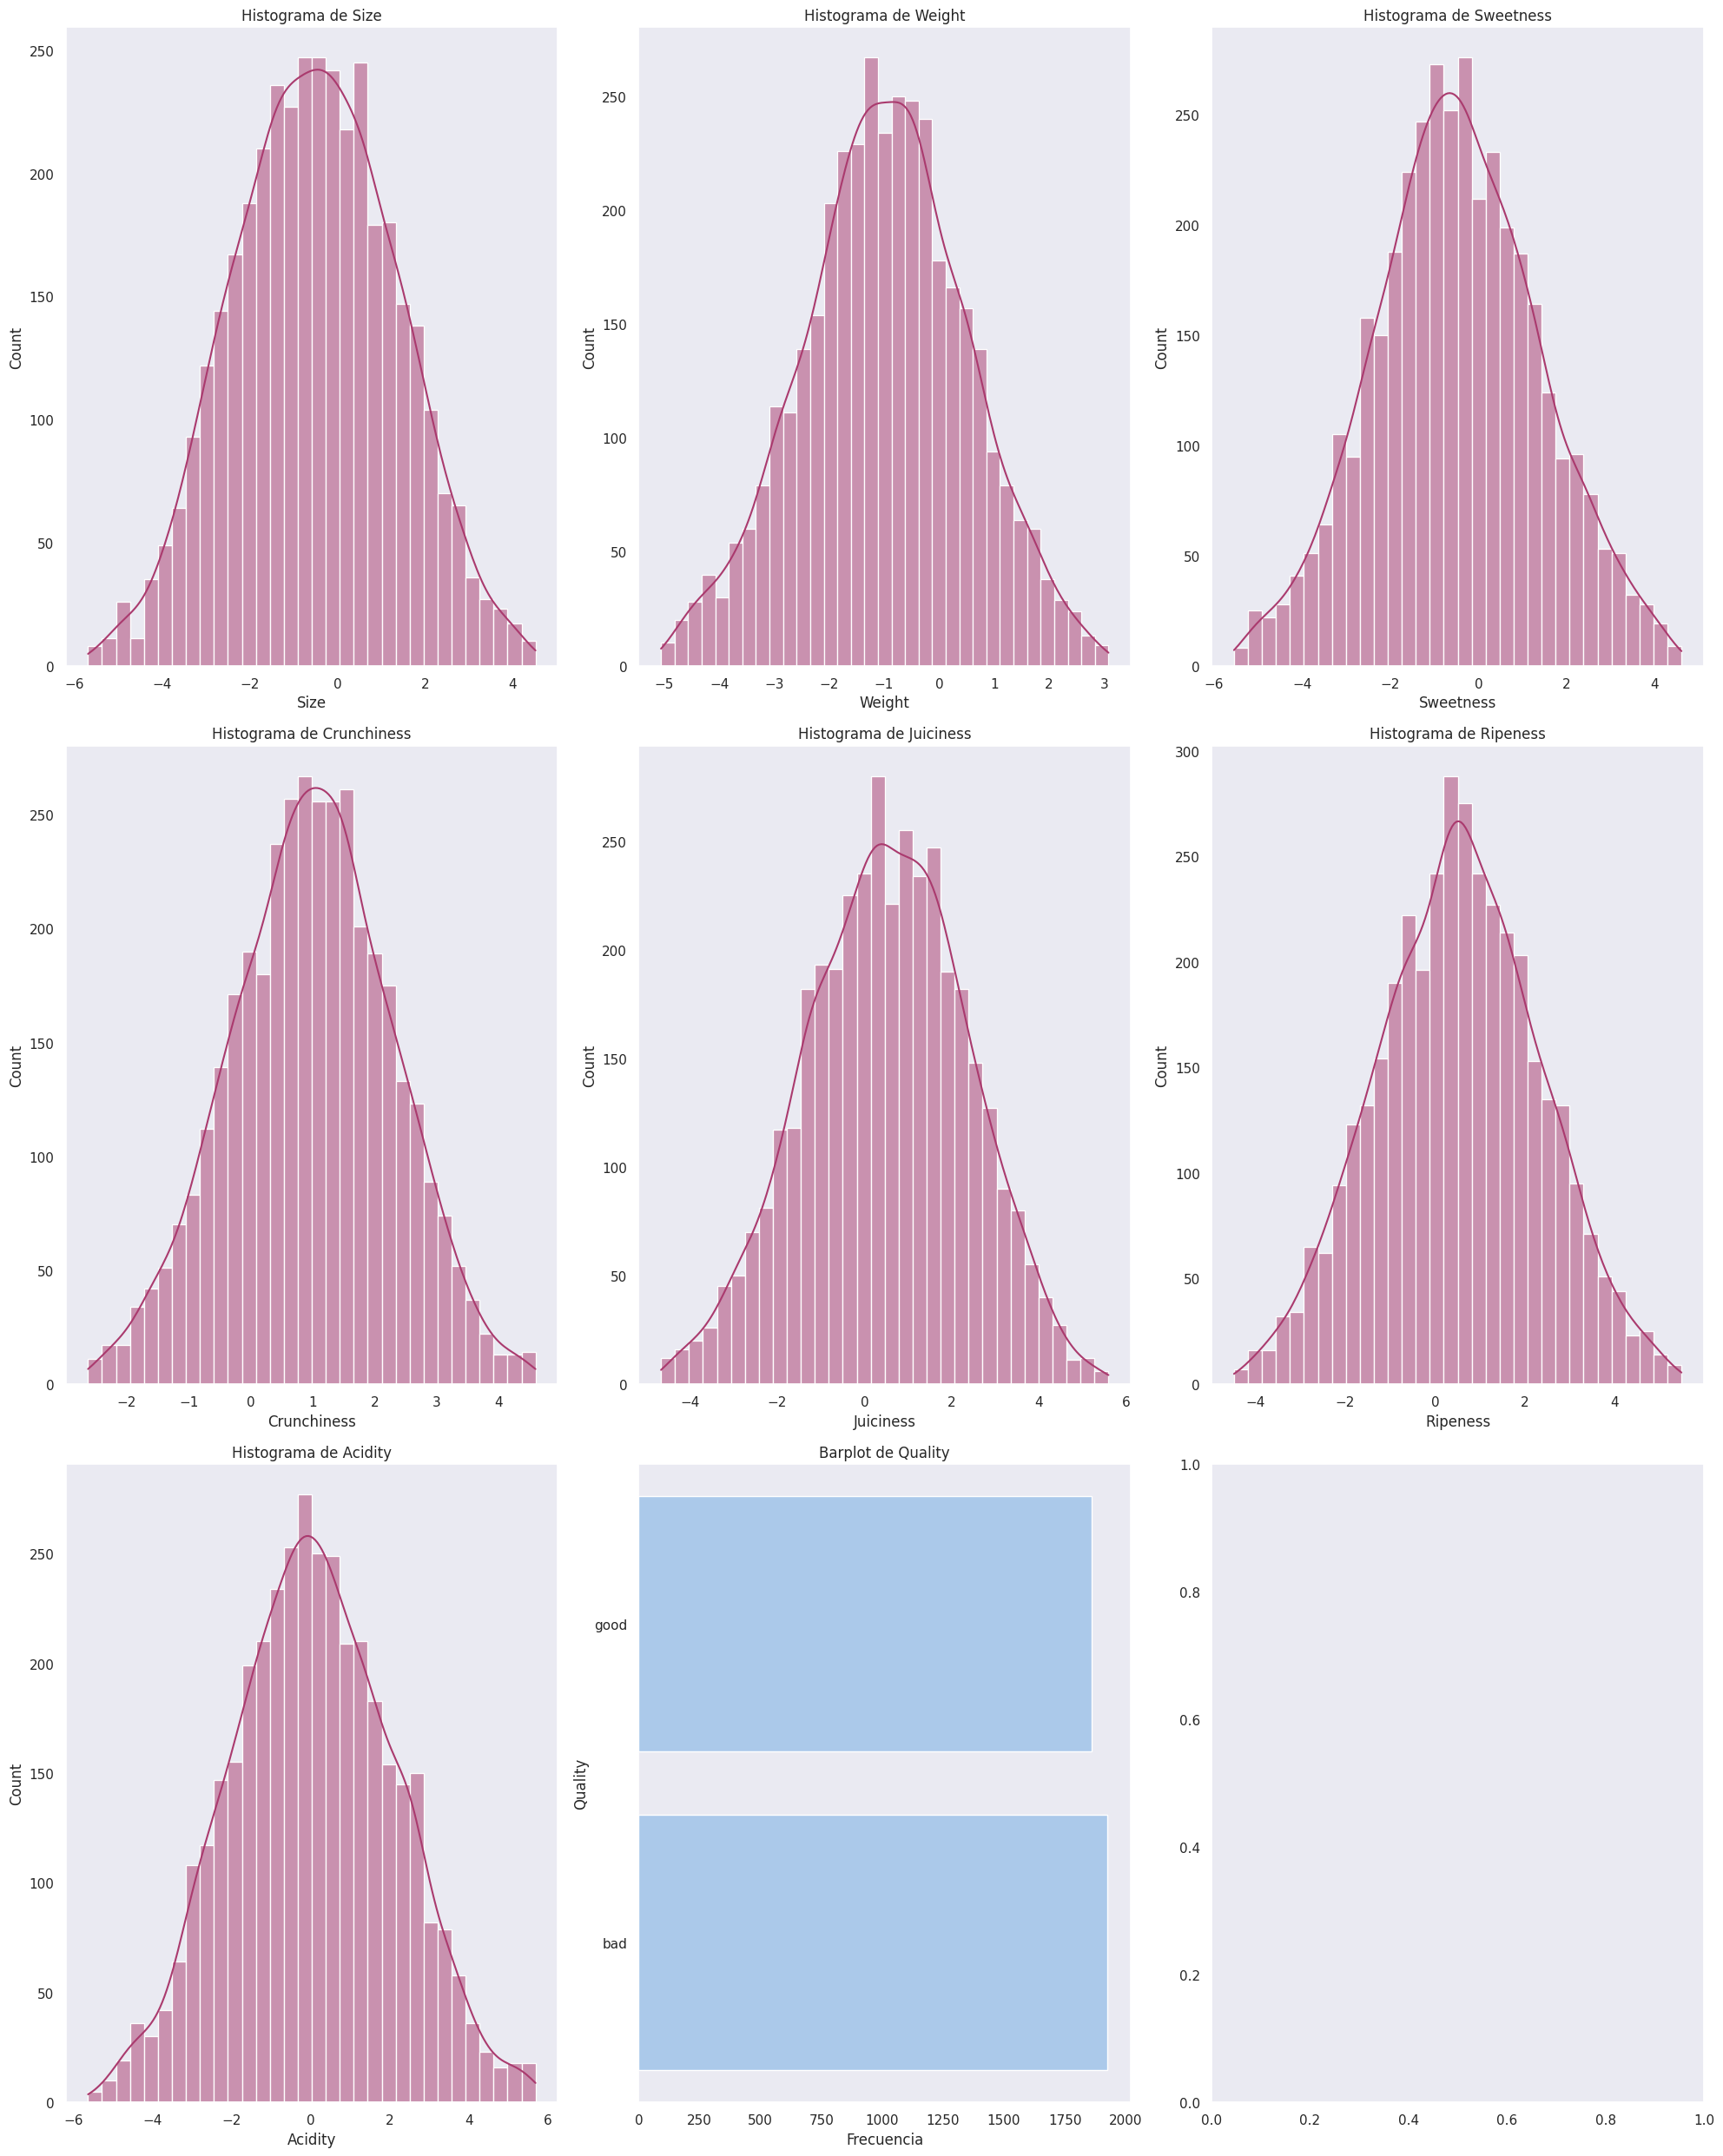

In [27]:
# Crear la figura y los ejes
num_columns = 3
num_rows = (len(df.columns) + num_columns - 1) // num_columns
fig, ax = plt.subplots(num_rows, num_columns, figsize=(20, 25))

sns.set_theme(style="darkgrid")

# Definir colores
hist_palette = sns.color_palette("flare", as_cmap=True)
bar_palette = sns.color_palette("pastel")

# Iterar sobre las columnas y crear el gráfico correspondiente
for i, col in enumerate(df.columns):
    row = i // num_columns
    col_pos = i % num_columns

    if col in continuous_columns:
        sns.histplot(df[col], kde=True, ax=ax[row, col_pos], color=hist_palette(0.6))
        ax[row, col_pos].set_title(f"Histograma de {col}")
    else:
        cat_count = df[col].value_counts().sort_values()
        sns.barplot(
            y=cat_count.index,
            x=cat_count.values,
            ax=ax[row, col_pos],
            orient="h",
            color=bar_palette[0],
        )
        ax[row, col_pos].set_title(f"Barplot de {col}")
        ax[row, col_pos].set_xlabel("Frecuencia")
        ax[row, col_pos].set_ylabel(col)

plt.tight_layout()
plt.show()

### Explicación de Hallazgos Basados en los Histogramas


#### 1. Histogramas de Características:

- **Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness y Acidity**:
  - **Distribución**: Todas estas características parecen seguir una distribución aproximadamente normal, con la mayoría de los valores concentrados alrededor de la media cerca de 0.
  - **Simetría**: Las distribuciones son simétricas, lo que indica que no hay sesgo significativo hacia valores extremos.
  - **Valores extremos**: Aunque los datos son simétricos, se pueden observar algunos valores extremos en ambos lados de la media, lo que puede corresponder a outliers observados anteriormente.
  - **Variabilidad**: La variabilidad en las características es bastante similar, con la mayoría de los datos concentrados dentro de un rango de -4 a 4.

#### 2. Barchart(good y bad):

- **Frecuencia**:
  - La categoría "bad" tiene una frecuencia mayor que la categoría "good".
  - Esto sugiere que en el dataset hay más frutas clasificadas como de baja calidad comparadas con las de alta calidad.

### Conclusiones Generales

1. **Distribución Normal**:
Las características muestran una distribución aproximadamente normal, lo que facilita el análisis en el dataset.


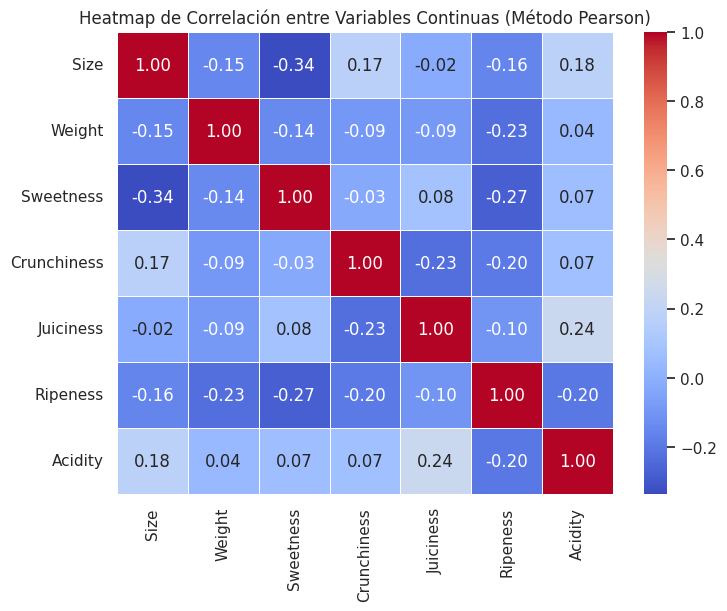

In [28]:
# Calcular la matriz de correlación solo para las variables continuas usando el método de Pearson
correlation_matrix = df[continuous_columns].corr(method="pearson")

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables Continuas (Método Pearson)")
plt.show()

### Explicación de Hallazgos Basados en el Heatmap de Correlación

#### 1. Correlaciones Fuertes y Moderadas

- **Sweetness y Size (-0.34)**: Existe una correlación negativa moderada entre Sweetness y Size, lo que sugiere que a medida que el tamaño de la fruta aumenta, la dulzura tiende a disminuir.
- **Ripeness y Sweetness (-0.27)**: Hay una correlación negativa moderada entre Ripeness y Sweetness. A medida que las frutas se vuelven más maduras, tienden a ser menos dulces.

#### 2. Correlaciones Débiles

- **Crunchiness y Juiciness (-0.23)**: Existe una débil correlación negativa entre Crunchiness y Juiciness, indicando que las frutas más crujientes tienden a ser menos jugosas.
- **Ripeness y Weight (-0.23)**: Hay una débil correlación negativa entre Ripeness y Weight. Las frutas más maduras tienden a ser un poco más livianas.
- **Crunchiness y Ripeness (-0.20)**: Una débil correlación negativa entre Crunchiness y Ripeness sugiere que las frutas más crujientes tienden a ser menos maduras.
- **Ripeness y Size (-0.16)**: Existe una débil correlación negativa entre Ripeness y Size. Las frutas más maduras tienden a ser ligeramente más pequeñas.

#### 3. Correlaciones Muy Débiles o Insignificantes

- **Size y Weight (-0.15)**: La correlación entre Size y Weight es muy débil, indicando que no hay una relación lineal fuerte entre el tamaño y el peso de las frutas.
- **Sweetness y Weight (-0.14)**: La correlación entre Sweetness y Weight también es muy débil.
- **Ripeness y Acidity (-0.20)**: Hay una correlación débil negativa entre Ripeness y Acidity, sugiriendo que las frutas más maduras tienden a ser menos ácidas.

### Conclusiones Generales

1. **Relaciones Lineales**: La mayoría de las relaciones entre las variables son débiles o moderadas, lo que sugiere que no hay fuertes relaciones lineales entre la mayoría de las características de las frutas.

2. **Insight sobre la Calidad**:
   - Las correlaciones negativas entre Ripeness y otras variables como Sweetness y Crunchiness podrían ser indicadores importantes para determinar la calidad y el estado de madurez de las frutas.
   - Las frutas más grandes tienden a ser menos dulces, lo cual puede influir en las decisiones de selección dependiendo del uso deseado de las frutas (por ejemplo, para consumo directo o procesamiento).

3. **Implicaciones para el Análisis**:
   - Dado que la mayoría de las correlaciones son débiles, podría ser necesario utilizar métodos de análisis más complejos o considerar la interacción de múltiples variables para obtener un mejor entendimiento de los factores que influyen en la calidad de las frutas.

## Actividad 2

In [29]:
# Transformar la columna Quality a valores numéricos
df = pd.get_dummies(data=df, columns=["Quality"], drop_first=True, dtype="int")

df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0


In [30]:
# Separar características y variable objetivo
X = df.drop("Quality_good", axis=1)
y = df["Quality_good"]

# Dividir los datos en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (2650, 7)
Test: (1136, 7)


### Entrenar y evaluar modelos individualmente

In [31]:
# Valores de C a evaluar (siete valores diferentes desde 0.001 hasta 0.02)
C_values = np.linspace(0.001, 0.02, 7)

# Funciones de kernel a evaluar
kernels = ["linear", "rbf", "poly"]

# Entrenar y evaluar los modelos
best_accuracy = 0
best_model_details = {}

In [32]:
for kernel in kernels:
    for C in C_values:
        # Entrenar el modelo
        if kernel == "poly":
            svm = SVC(kernel=kernel, C=C, verbose=False, degree=3)
        else:
            svm = SVC(kernel=kernel, C=C, verbose=False)

        svm.fit(X_train, y_train)

        # Predecir y evaluar el modelo
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Imprimir los resultados para este modelo
        print(f"Kernel: {kernel}, C: {C:.3f}, Accuracy: {accuracy:.4f}")

        # Guardar el mejor modelo
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_details = {"kernel": kernel, "C": C, "accuracy": accuracy}

# Mostrar los detalles del mejor modelo
print("\nMejor modelo:")
print(f"Kernel: {best_model_details['kernel']}")
print(f"Mejor C: {best_model_details['C']:.3f}")
print(f"Mejor Accuracy: {best_model_details['accuracy']:.4f}")

Kernel: linear, C: 0.001, Accuracy: 0.7579
Kernel: linear, C: 0.004, Accuracy: 0.7623
Kernel: linear, C: 0.007, Accuracy: 0.7579
Kernel: linear, C: 0.010, Accuracy: 0.7562
Kernel: linear, C: 0.014, Accuracy: 0.7570
Kernel: linear, C: 0.017, Accuracy: 0.7570
Kernel: linear, C: 0.020, Accuracy: 0.7588
Kernel: rbf, C: 0.001, Accuracy: 0.4991
Kernel: rbf, C: 0.004, Accuracy: 0.5062
Kernel: rbf, C: 0.007, Accuracy: 0.7967
Kernel: rbf, C: 0.010, Accuracy: 0.8143
Kernel: rbf, C: 0.014, Accuracy: 0.8239
Kernel: rbf, C: 0.017, Accuracy: 0.8266
Kernel: rbf, C: 0.020, Accuracy: 0.8301
Kernel: poly, C: 0.001, Accuracy: 0.5009
Kernel: poly, C: 0.004, Accuracy: 0.7808
Kernel: poly, C: 0.007, Accuracy: 0.8160
Kernel: poly, C: 0.010, Accuracy: 0.8178
Kernel: poly, C: 0.014, Accuracy: 0.8178
Kernel: poly, C: 0.017, Accuracy: 0.8160
Kernel: poly, C: 0.020, Accuracy: 0.8187

Mejor modelo:
Kernel: rbf
Mejor C: 0.020
Mejor Accuracy: 0.8301


## Actividad 3

In [34]:
# Seleccionar las características y la variable objetivo
X = df.drop(columns=["Quality_good", "Sweetness"])
y = df["Sweetness"]

# Dividir los datos en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (2650, 6)
Test: (1136, 6)


### Entrenar el modelo de regresión lineal

In [35]:
# Entrenar el modelo de regresión lineal
reg = LinearRegression()
reg.fit(X_train, y_train)

beta0 = reg.intercept_
coefs = reg.coef_

print(f"Intercepto: {beta0}")
print(f"Coeficientes: {coefs}")

Intercepto: -0.7414543582314621
Coeficientes: [-0.45948115 -0.39895615 -0.11261836 -0.0359134  -0.44021559  0.07870522]


In [36]:
# Predecir el nivel de dulzor en el conjunto de prueba
y_pred_test = reg.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Mostrar los coeficientes del modelo
coef_df = pd.DataFrame(reg.coef_, X.columns, columns=["Coefficient"])
print("\nCoeficientes del modelo:")
coef_df


Coeficientes del modelo:


,Coefficient
Size,-0.459481
Weight,-0.398956
Crunchiness,-0.112618
Juiciness,-0.035913
Ripeness,-0.440216
Acidity,0.078705


### Entrenar el modelo de regresión lineal (Estandarizando los datos) solo para probar cuál queda mejor con o sin estandarizar

In [37]:
# Estandarizar las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir los arrays escalados de nuevo a DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [38]:
# Entrenar el modelo de regresión lineal
reg_scaled = LinearRegression()
reg_scaled.fit(X_train_scaled, y_train)

beta0 = reg_scaled.intercept_
coefs = reg_scaled.coef_

print(f"Intercepto: {beta0}")
print(f"Coeficientes: {coefs}")

Intercepto: -0.46835904981433973
Coeficientes: [-0.8484529  -0.59335068 -0.14546522 -0.06645478 -0.786792    0.16155136]


In [39]:
# Predecir el nivel de dulzor en el conjunto de prueba
y_pred_test_scaled = reg.predict(X_test_scaled)

# Evaluar el modelo
mse_scaled = mean_squared_error(y_test, y_pred_test_scaled)
r2_scaled = r2_score(y_test, y_pred_test_scaled)

# Mostrar los coeficientes del modelo
coef_df = pd.DataFrame(reg_scaled.coef_, X.columns, columns=["Coefficient"])
print("\nCoeficientes del modelo:")
coef_df


Coeficientes del modelo:


,Coefficient
Size,-0.848453
Weight,-0.593351
Crunchiness,-0.145465
Juiciness,-0.066455
Ripeness,-0.786792
Acidity,0.161551


### Comparativa sin estandarizar VS estandarizado

In [43]:
print("Sin estandarizar")
print("================")
print(f"(MSE): {mse}")
print(f"(R2): {r2}")
print("\n")
print("Estandarizado")
print("================")
print(f"(MSE): {mse_scaled}")
print(f"(R2): {r2_scaled}")

print("\n")

if r2 > r2_scaled:
  print("Modelo SIN estandarizar es superior")
else:
  print("Modelo estandarizando las variables es superior")

Sin estandarizar
(MSE): 2.3739251833607624
(R2): 0.3054614241430169


Estandarizado
(MSE): 2.6223019035358597
(R2): 0.23279392193377624


Modelo SIN estandarizar es superior


### Predecir el nivel de dulzor en el conjunto de entrenamiento

In [44]:
# Predecir el nivel de dulzor en el conjunto de entrenamiento
y_train_pred = reg.predict(X_train)

# Calcular los residuos
residuals = y_train - y_train_pred

print(f"Residuo: {residuals}")

Residuo: 409    -0.925629
314     1.536767
3641   -0.594785
3262   -0.673944
3524   -0.738632
          ...   
3141   -0.539938
3925    2.651640
2958    1.895259
2110   -1.145902
3102   -1.698400
Name: Sweetness, Length: 2650, dtype: float64


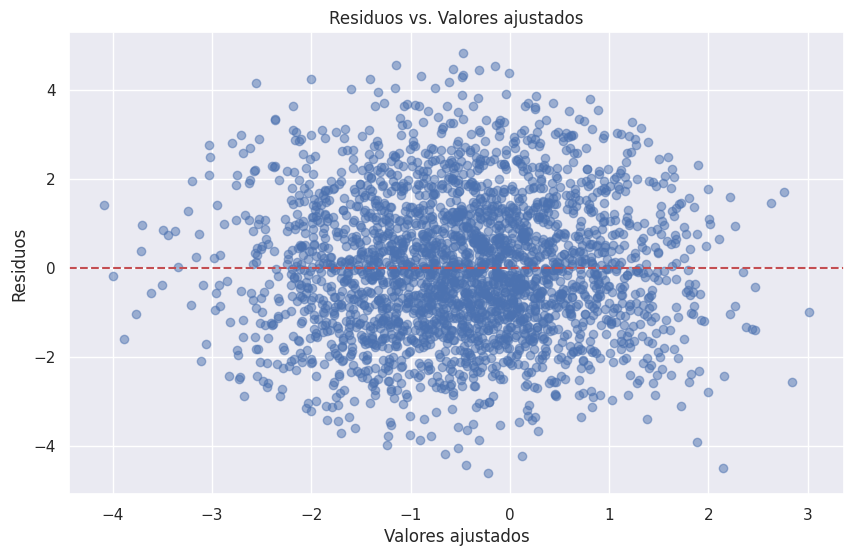

In [45]:
# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores ajustados")
plt.show()

#### 1. **Gráfico de Residuos vs. Valores Ajustados**

- **Interpretación**:
  - Los residuos parecen estar distribuidos aleatoriamente alrededor de la línea horizontal de 0, lo cual es una buena señal de que el modelo no presenta patrones evidentes que sugieran falta de ajuste.
  - La variabilidad de los residuos parece ser bastante constante a lo largo de los valores ajustados.

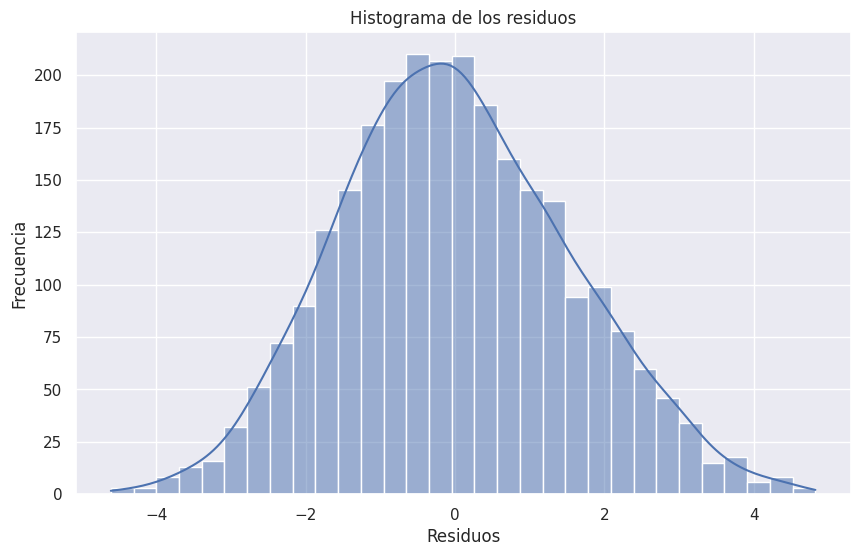

In [46]:
# Histograma de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.show()

#### 2. **Histograma de los Residuos**

- **Interpretación**:
  - El histograma muestra que los residuos siguen una distribución aproximadamente normal, centrada en torno a 0.
  - La curva de densidad superpuesta también sugiere una distribución normal.

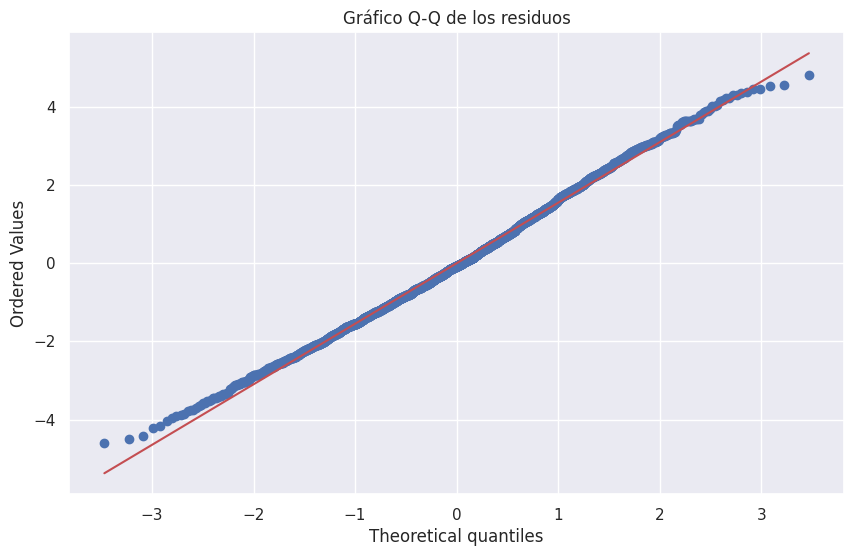

In [47]:
# Gráfico Q-Q para los residuos
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de los residuos")
plt.show()

#### 3. **Gráfico Q-Q de los Residuos**

- **Interpretación**:
  - Los puntos en el gráfico Q-Q se alinean bastante bien con la línea diagonal, lo cual es un buen indicador de que los residuos siguen una distribución normal.
  - Aunque hay algunos puntos en los extremos que se desvían de la línea, la mayor parte de los residuos se encuentra cerca de la línea de referencia, lo que sugiere que los residuos son aproximadamente normales.

In [48]:
# Calcular y mostrar la media y desviación estándar de los residuos
mean_residuals = np.mean(residuals)
std_residuals = np.std(residuals)
print(f"Media de los residuos: {mean_residuals}")
print(f"Desviación estándar de los residuos: {std_residuals}")

Media de los residuos: 6.70323335622736e-18
Desviación estándar de los residuos: 1.5503455134096924


**Interpretación**:
  - La media de los residuos es extremadamente cercana a cero, lo que cumple con el supuesto de que los residuos deben tener una media cero.
  - La desviación estándar de los residuos indica la dispersión de los mismos.

### Conclusión

En resumen, los análisis realizados sugieren que los residuos del modelo de regresión lineal cumplen con los supuestos necesarios: distribución normal con media cero. Esto indica que el modelo de regresión lineal es apropiado para los datos y que sus predicciones son fiables bajo estos supuestos.

## Actividad 4

In [51]:
print("Sin estandarizar")
print("================")
print(f"(MSE): {mse}")
print(f"(R2): {r2}")
print("\n")
print("Estandarizado")
print("================")
print(f"(MSE): {mse_scaled}")
print(f"(R2): {r2_scaled}")

print("\n")

if r2 > r2_scaled:
  print("Modelo SIN estandarizar es superior")
else:
  print("Modelo estandarizando las variables es superior")

Sin estandarizar
(MSE): 2.3739251833607624
(R2): 0.3054614241430169


Estandarizado
(MSE): 2.6223019035358597
(R2): 0.23279392193377624


Modelo SIN estandarizar es superior


In [52]:
# Mostrar los coeficientes del modelo
coef_df = pd.DataFrame(reg.coef_, X.columns, columns=["Coefficient"])
print("\nCoeficientes del modelo:")
coef_df


Coeficientes del modelo:


,Coefficient
Size,-0.459481
Weight,-0.398956
Crunchiness,-0.112618
Juiciness,-0.035913
Ripeness,-0.440216
Acidity,0.078705


- **Size**: Un incremento en el tamaño de la manzana se asocia con una disminución en el nivel de dulzor, dado que el coeficiente es negativo (-0.459617).
- **Weight**: Similarmente, un aumento en el peso está relacionado con una disminución en el dulzor (-0.399949).
- **Crunchiness**: La textura crujiente tiene un impacto negativo menor en el dulzor (-0.113297).
- **Juiciness**: La jugosidad tiene un impacto muy pequeño y negativo en el dulzor (-0.030738).
- **Ripeness**: La madurez también se asocia con una disminución en el dulzor (-0.434337).
- **Acidity**: La acidez tiene un impacto positivo muy pequeño en el nivel de dulzor (0.080616).

In [53]:
# Pruebas manuales
num_samples = 5  # Número de pruebas manuales a realizar
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

print("\nPruebas Manuales:")
for idx in random_indices:
    print(f"Observación {idx}:")
    print(f"Características: {X_test.iloc[idx].to_dict()}")
    print(f"Predicción esperada: {y_test.iloc[idx]}")
    print(f"Predicción del modelo: {y_pred_test[idx]}")
    print("---")


Pruebas Manuales:
Observación 795:
Características: {'Size': -1.210278046, 'Weight': -1.877977297, 'Crunchiness': 1.916409607, 'Juiciness': 1.866807943, 'Ripeness': 1.752718605, 'Acidity': 1.512497334}
Predicción esperada: -0.837016593
Predicción del modelo: -0.37152278466193156
---
Observación 74:
Características: {'Size': -4.902445625, 'Weight': -0.665739714, 'Crunchiness': 1.728527493, 'Juiciness': 1.32193595, 'Ripeness': 1.074921259, 'Acidity': 1.611813638}
Predicción esperada: 2.699210099
Predicción del modelo: 1.1882498220243194
---
Observación 487:
Características: {'Size': -0.514290903, 'Weight': -0.986576972, 'Crunchiness': 2.85563019, 'Juiciness': 2.13771042, 'Ripeness': 0.1533657, 'Acidity': 0.553623544}
Predicción esperada: 2.178763749
Predicción del modelo: -0.533856194466222
---
Observación 828:
Características: {'Size': -1.204352153, 'Weight': -2.990568901, 'Crunchiness': -1.368078407, 'Juiciness': 1.068931692, 'Ripeness': 4.645671754, 'Acidity': -4.559664683}
Predicció

### Evaluación del Modelo

- La baja correlación entre Sweetness y las demás variables puede indicar que estas características no explican bien la variabilidad en el dulzor de las manzanas. Esta baja correlación puede ser una razón por la que el modelo de regresión lineal no tiene un desempeño óptimo.

- El modelo explica aproximadamente el 32.1% de la variabilidad en el nivel de dulzor de las manzanas. Sin embargo, el MSE de 2.2762413099169874 indica que todavía hay errores significativos en las predicciones.
  
- Los residuos están distribuidos alrededor de la línea roja horizontal (y = 0), lo cual es un buen indicador. Sin embargo, no parecen estar distribuidos uniformemente a lo largo de todos los valores ajustados. Hay más dispersión en los extremos (-4 a 4) y menos en el centro.
